In [23]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns


In [24]:
# Read CSV file
complete_data = pd.read_csv('HR-Employee-Attrition.csv', low_memory=False)
complete_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [25]:
# Check for data types
complete_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [26]:
# Check for the number of the values (to see if we have missing value)
complete_data.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

In [27]:
# Dropping unwanted columns
cleaned_data = complete_data.drop(columns=['BusinessTravel', 'EmployeeCount', 'DistanceFromHome',
                                             'Over18', 'StockOptionLevel', 'StandardHours'])
# Assign EmployeeNumber as an index


cleaned_data.head()

,Age,Attrition,DailyRate,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,Sales,2,Life Sciences,1,2,Female,94,...,11,3,1,8,0,1,6,4,0,5
1,49,No,279,Research & Development,1,Life Sciences,2,3,Male,61,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,1373,Research & Development,2,Other,4,4,Male,92,...,15,3,2,7,3,3,0,0,0,0
3,33,No,1392,Research & Development,4,Life Sciences,5,4,Female,56,...,11,3,3,8,3,3,8,7,3,0
4,27,No,591,Research & Development,1,Medical,7,1,Male,40,...,12,3,4,6,3,3,2,2,2,2


In [28]:
# selecting numeric columns to crate a summary statistic table
numeric_cols = cleaned_data.select_dtypes(include=['number']).columns
# Getting the mean, median, var, std, sem for each column
summary_table = cleaned_data[numeric_cols].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table

,Age,DailyRate,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
mean,36.923810,802.485714,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6.502931e+03,...,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
median,36.000000,802.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4.919000e+03,...,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
var,83.455049,162819.593737,1.048914,362433.299749,1.194829,413.285626,0.506319,1.225316,1.216270,2.216486e+07,...,13.395144,0.130194,1.169013,60.540563,1.662219,0.499108,37.534310,13.127122,10.384057,12.731595
std,9.135373,403.509100,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4.707957e+03,...,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
sem,0.238269,10.524335,0.026712,15.702015,0.028510,0.530233,0.018559,0.028871,0.028764,1.227931e+02,...,0.095459,0.009411,0.028200,0.202939,0.033627,0.018426,0.159792,0.094499,0.084048,0.093064


In [29]:
# Check the values of Department column
cleaned_data['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [30]:
# Check the value for MaritalStatus column
cleaned_data['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [31]:
# Check the value for EducationField column
cleaned_data['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [32]:
cleaned_data[['Department', 'Attrition','EducationField', 'Gender', 'Age', 'DailyRate', 'EnvironmentSatisfaction',
               'JobSatisfaction', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
              'WorkLifeBalance', 'YearsAtCompany']]

,Department,Attrition,EducationField,Gender,Age,DailyRate,EnvironmentSatisfaction,JobSatisfaction,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany
0,Sales,Yes,Life Sciences,Female,41,1102,2,4,Yes,3,1,1,6
1,Research & Development,No,Life Sciences,Male,49,279,3,2,No,4,4,3,10
2,Research & Development,Yes,Other,Male,37,1373,4,3,Yes,3,2,3,0
3,Research & Development,No,Life Sciences,Female,33,1392,4,3,Yes,3,3,3,8
4,Research & Development,No,Medical,Male,27,591,1,2,No,3,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Research & Development,No,Medical,Male,36,884,3,4,No,3,3,3,5
1466,Research & Development,No,Medical,Male,39,613,4,1,No,3,1,3,7
1467,Research & Development,No,Life Sciences,Male,27,155,2,2,Yes,4,2,3,6
1468,Sales,No,Medical,Male,49,1023,4,2,No,3,4,2,9


Does working overtime affect employees' performance ratings? 

In [33]:
# Total number of employees who works full time in a bar chart
overtime = pd.DataFrame(cleaned_data['OverTime']).value_counts()
overtime

OverTime
No          1054
Yes          416
Name: count, dtype: int64

### What's the impace of income toward attrition
Is the income really a major reason for people to leave?

### Question to bve asked:
##### What is the average monthly income by department? is there any signigicant differences between individuals who quits and who don't?
##### Are individuals with lower income has a lower job satisfaction than the ones who are getting higher income?
##### Do employees who quit the organization have much lower income than people who didn't quit?

Attrition
No     1233
Yes     237
Name: count, dtype: int64


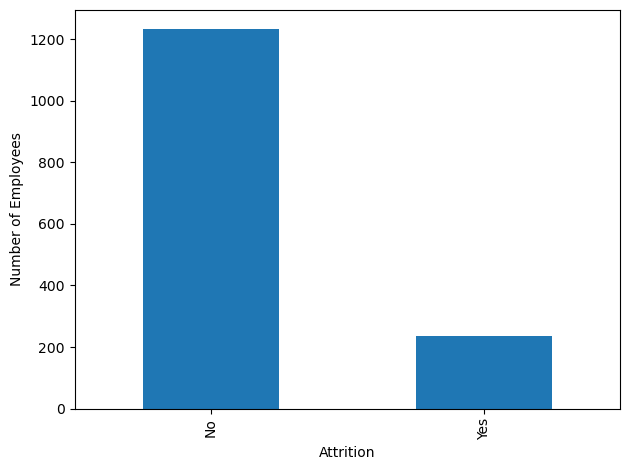

In [34]:
# First we get the total employees Attrition and plot it.
total_att = cleaned_data['Attrition'].value_counts()
print(total_att)
total_att.plot(kind='bar', ylabel='Number of Employees')
plt.tight_layout()
plt.show()

In [43]:
# Printing summary statistics 
summary_stat = cleaned_data['MonthlyIncome'].describe()
print(round(summary_stat,2))

count     1470.00
mean      6502.93
std       4707.96
min       1009.00
25%       2911.00
50%       4919.00
75%       8379.00
max      19999.00
Name: MonthlyIncome, dtype: float64


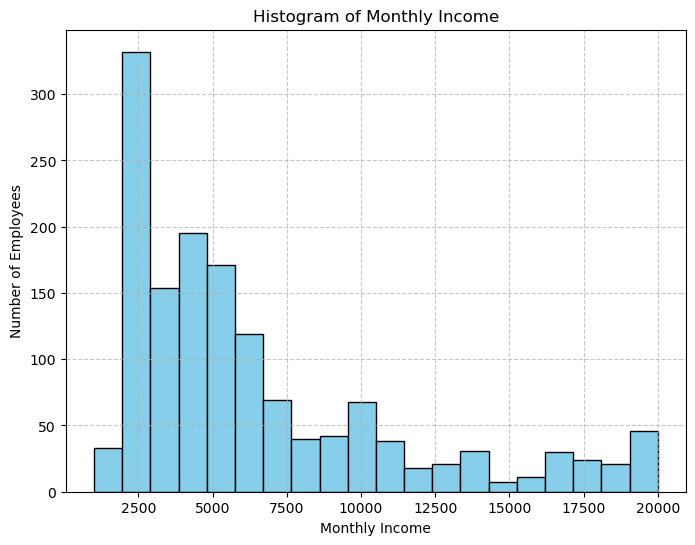

In [35]:
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(cleaned_data['MonthlyIncome'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Number of Employees')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

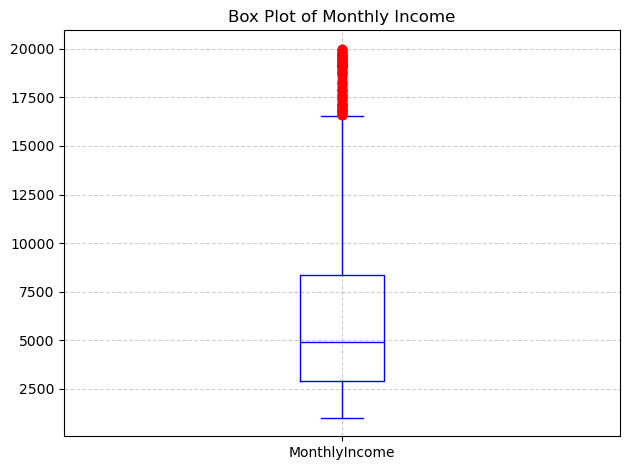

In [48]:
# Create a box plot
cleaned_data['MonthlyIncome'].plot(kind='box', title='Box Plot of Monthly Income', color='b', sym='r')
plt.grid(True, linestyle='--', alpha=.6)
plt.tight_layout()
plt.show()

In [50]:
# Calculating the outliers and IQR to exclude them from the analysis.

# Calculate IQR to exclude the outliers
Q1 = cleaned_data['MonthlyIncome'].quantile(0.25)
Q3 = cleaned_data['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method
outliers_iqr = cleaned_data[(cleaned_data['MonthlyIncome'] >= Q1 - 1.5 * IQR) | (cleaned_data['MonthlyIncome'] <= Q3 + 1.5 * IQR)]

In [39]:
# Get the average income for each department
avg_dep = outliers_iqr.groupby(['Department', 'Attrition'])['MonthlyIncome'].mean().reset_index()
print(round(avg_dep,2))

               Department Attrition  MonthlyIncome
0         Human Resources        No        7345.98
1         Human Resources       Yes        3715.75
2  Research & Development        No        6630.33
3  Research & Development       Yes        4108.08
4                   Sales        No        7232.24
5                   Sales       Yes        5908.46


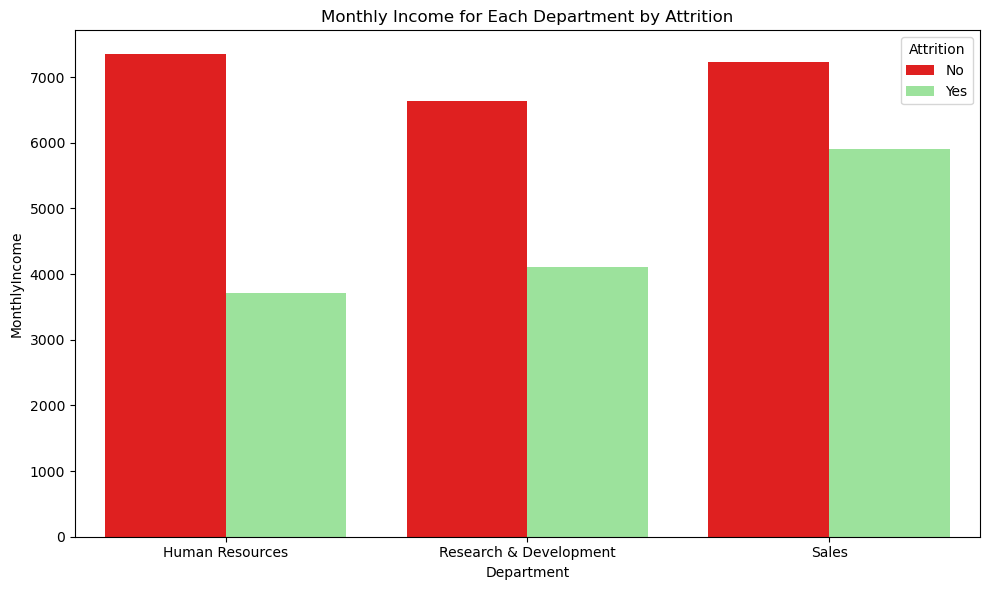

In [40]:
# plotting the data into a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Department', y='MonthlyIncome', hue='Attrition', data=avg_dep, palette=('red','lightgreen'))
plt.title('Monthly Income for Each Department by Attrition')
plt.tight_layout()
plt.show()

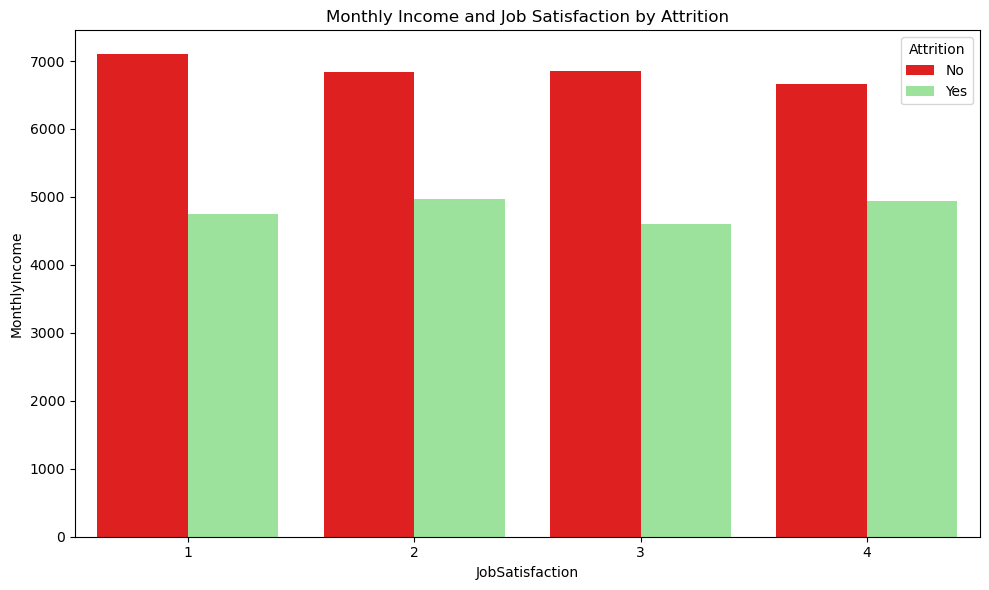

In [41]:
# Getting the job satisfaction by income
income_sat = outliers_iqr.groupby(['Attrition', 'JobSatisfaction'])['MonthlyIncome'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='JobSatisfaction', y='MonthlyIncome', hue='Attrition', data=income_sat, palette=('red', 'lightgreen'))
plt.title('Monthly Income and Job Satisfaction by Attrition')
plt.tight_layout()
plt.show()

<Axes: ylabel='MonthlyIncome'>

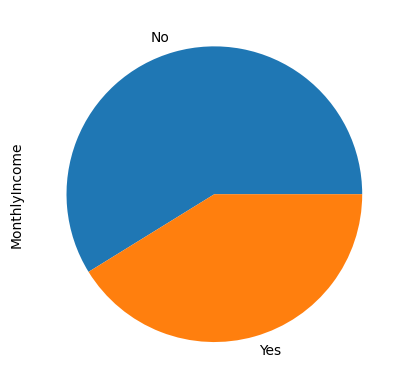

In [42]:
inc_att = outliers_iqr.groupby('Attrition')['MonthlyIncome'].mean()

inc_att.plot(kind='pie')